The file house_prices.csv contains 20 predictors and the sale price.

Split the dataset into training and testing using the `train_test_split` function with parameters `test_size=0.3, random_state=42.`

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('house_prices (3).csv')
df.head()
X = pd.DataFrame(df.drop(columns=['price']))
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20
108,13.964434,-4.217861,23.243539,2.463535,-17.835723,18.220957,26.315294,-10.881611,27.015424,-10.525323,15.717846,19.500206,-12.684585,-21.114710,12.631730,10.529218,-4.849612,0.426829,16.809657,-0.544594
272,4.709036,-3.243007,-21.255261,-15.820980,10.529057,6.204234,13.971754,-1.564073,30.560271,25.187701,-17.768742,13.376431,27.416316,14.864511,-10.129580,-4.873142,0.790096,19.500528,14.937885,-7.317204
599,13.376900,-19.996406,-35.435604,-20.193387,26.608800,17.085965,8.298858,9.315915,-13.174055,2.125168,1.482018,17.230434,12.273938,15.707255,3.987012,13.192227,14.178322,19.729620,-19.621219,19.483585
479,5.906190,-10.957342,-5.437273,-22.530948,3.327451,-3.832104,34.847128,-6.493656,2.561833,18.812451,-4.803824,47.590075,-1.298306,23.614756,-16.344267,13.361025,18.896597,34.130041,-3.431386,29.701159
436,9.888188,-26.574310,-20.215125,-21.003896,26.001843,9.738360,17.393519,-2.208022,-10.161064,5.873282,6.691287,18.309348,1.022868,16.870912,-0.608969,10.199093,11.941669,26.238357,-18.059690,24.912501


Perform K-means clustering on the training set, selecting the optimal number of clusters via the elbow criterion on the within-cluster sum of squares. What is the selected number of clusters?

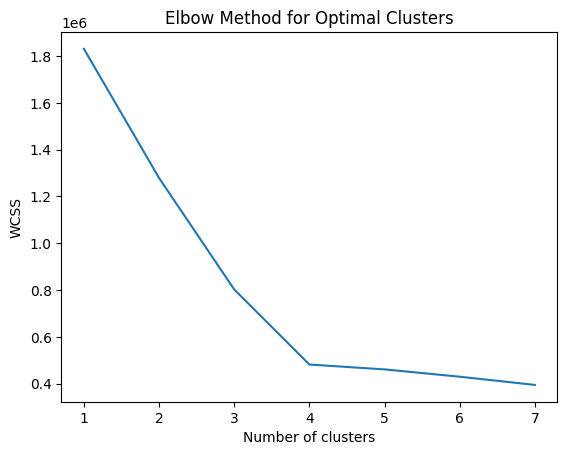

In [9]:
# importing kmeans for clustering
from sklearn.cluster import KMeans
wcss_ = []
for i in range(1, 8):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_train)
    wcss_.append(model.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 8), wcss_)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


Fit a separate linear regression with ridge penalty in each cluster. In each cluster, use cross-validation (5-fold) to select the optimal shrinkage parameter in the range  alpha = np.logspace(-3, 3, 15)

In [ ]:
# importing Ridge for regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

clusters = KMeans(n_clusters=4, random_state=42).fit_predict(X)

clusters_train = clusters[X_train.index]
clusters_test = clusters[X_test.index]

best_parameters = {}
mse_scores = {}
for i in range(4):

    X_sub_train = X_train.loc[clusters_train == i, :]
    y_sub_train = y_train.loc[clusters_train == i]

    model = Ridge()
    ridge_search = GridSearchCV(model, param_grid={'alpha': np.logspace(-3, 3, 20)}, cv=5)
    ridge_search.fit(X_sub_train, y_sub_train)
    best_parameters[f'cluster{i}'] = ridge_search.best_params_
    
    X_sub_test = X_test.loc[clusters_test == i, :]
    y_sub_test = y_test.loc[clusters_test == i]

    mse = mean_squared_error(y_sub_test, ridge_search.predict(X_sub_test))
    mse_scores[f'cluster{i}'] = mse

best_parameters, mse_scores

({'cluster0': {'alpha': np.float64(0.004281332398719396)},
  'cluster1': {'alpha': np.float64(0.018329807108324356)},
  'cluster2': {'alpha': np.float64(0.00206913808111479)},
  'cluster3': {'alpha': np.float64(0.001)}},
 {'cluster0': 35.66228017726311,
  'cluster1': 31.866140397963907,
  'cluster2': 22.1845189303148,
  'cluster3': 39.956096184251784})

Now we add another layer before performing K-means: first we perform dimensionality reduction by PCA. Contrary to the previous point 2, the ridge penalty parameter is now fixed to alpha = 0.1.

Select the number of components as well as the number of clusters for K-means via 5-fold cross-validation.

For the number of components, consider the possible values [2, 3, 4, 5, 6, 7], while for the number of clusters [2, 4, 6, 8, 10].

Report the optimal number of clusters, the number of components, the cross-validation error, and the error on the test set.

Text(0.5, 1.0, 'WCSS for Different PCA Components and Clusters')

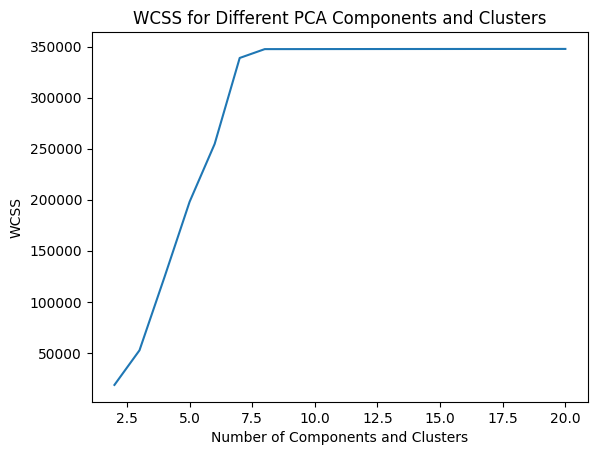

In [67]:
# Now we add another layer before performing K-means: first we perform dimensionality reduction by PCA. Contrary to the previous point 2, the ridge penalty parameter is now fixed to alpha = 0.1.

# Select the number of components as well as the number of clusters for K-means via 5-fold cross-validation.

# For the number of components, consider the possible values [2, 3, 4, 5, 6, 7], while for the number of clusters [2, 4, 6, 8, 10].

# Report the optimal number of clusters, the number of components, the cross-validation error, and the error on the test set.

#importing pca
from sklearn.decomposition import PCA
components = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
clusters = [2,3,4,6,8,10]

#choosing the best combination based on wcss
wcss = {}
for co in components:
    for cl in clusters:
        pca = PCA(n_components=co)
        X_pca = pca.fit_transform(X_train)
        
        kmeans = KMeans(n_clusters=cl, random_state=42)
        kmeans.fit(X_pca)
        inertia = kmeans.inertia_
        wcss[(co)] = inertia

plt.plot(wcss.keys(), wcss.values())
plt.xlabel('Number of Components and Clusters')
plt.ylabel('WCSS')
plt.title('WCSS for Different PCA Components and Clusters')